In [1]:
import pandas as pd
import seaborn as sns
from functools import reduce
import matplotlib.pyplot as plt
sns.set_theme()
sns.set(font_scale = 3)
plt.rcParams['figure.figsize']=(40,40)

In [2]:
folders = ['json', 'gltf', 'gltf_on_demand', 'gltf_on_demand_multiple_files', 'gltf_on_demand_multiple_files_lod', 'gltf_on_demand_multiple_files_lod_active_scene']
fileNames = ['fps', 'results']
stats = ['FPS', 'MEMORY', 'CPU']

def readFilesIntoDataframes(folder):
    dfs = {}
    
    for fileName in fileNames:
        df = pd.read_json(f"{folder}/{fileName}.json")
        
        dfs[fileName] = df
        
    return dfs

def get_domain_specific_dataframes():
    result = {}
    
    for stat in stats:
        result[stat] = []
    
    for config in folders:
        dfs = readFilesIntoDataframes(config)
        for stat in fileNames:
            df = dfs[stat]
            
            for col in df.columns:
                if (col != "TIME" and col != 'x' and col != 'y') :
                    name_replacement = {col: f"{config}_{col}"}
                    sub_df = df[["TIME", col]]
                    sub_df = df.rename(columns=name_replacement)
                    result[col].append(sub_df)

            
            
    return result

In [3]:
result = get_domain_specific_dataframes()

df_dict = {}

for stat, dfs in result.items():    
    
    correct_dfs = []
    
    for df in dfs:    
        correct_columns = list(filter(lambda col: '_x' not in col and '_y' not in col and ('_' in col or col == 'TIME'), df.columns))
        correct_df = df[correct_columns]
        correct_dfs.append(correct_df)

    df_merged = reduce(lambda left,right: pd.merge(left,right,on=['TIME']), correct_dfs)
    df_dict[stat] = df_merged

<AxesSubplot: >

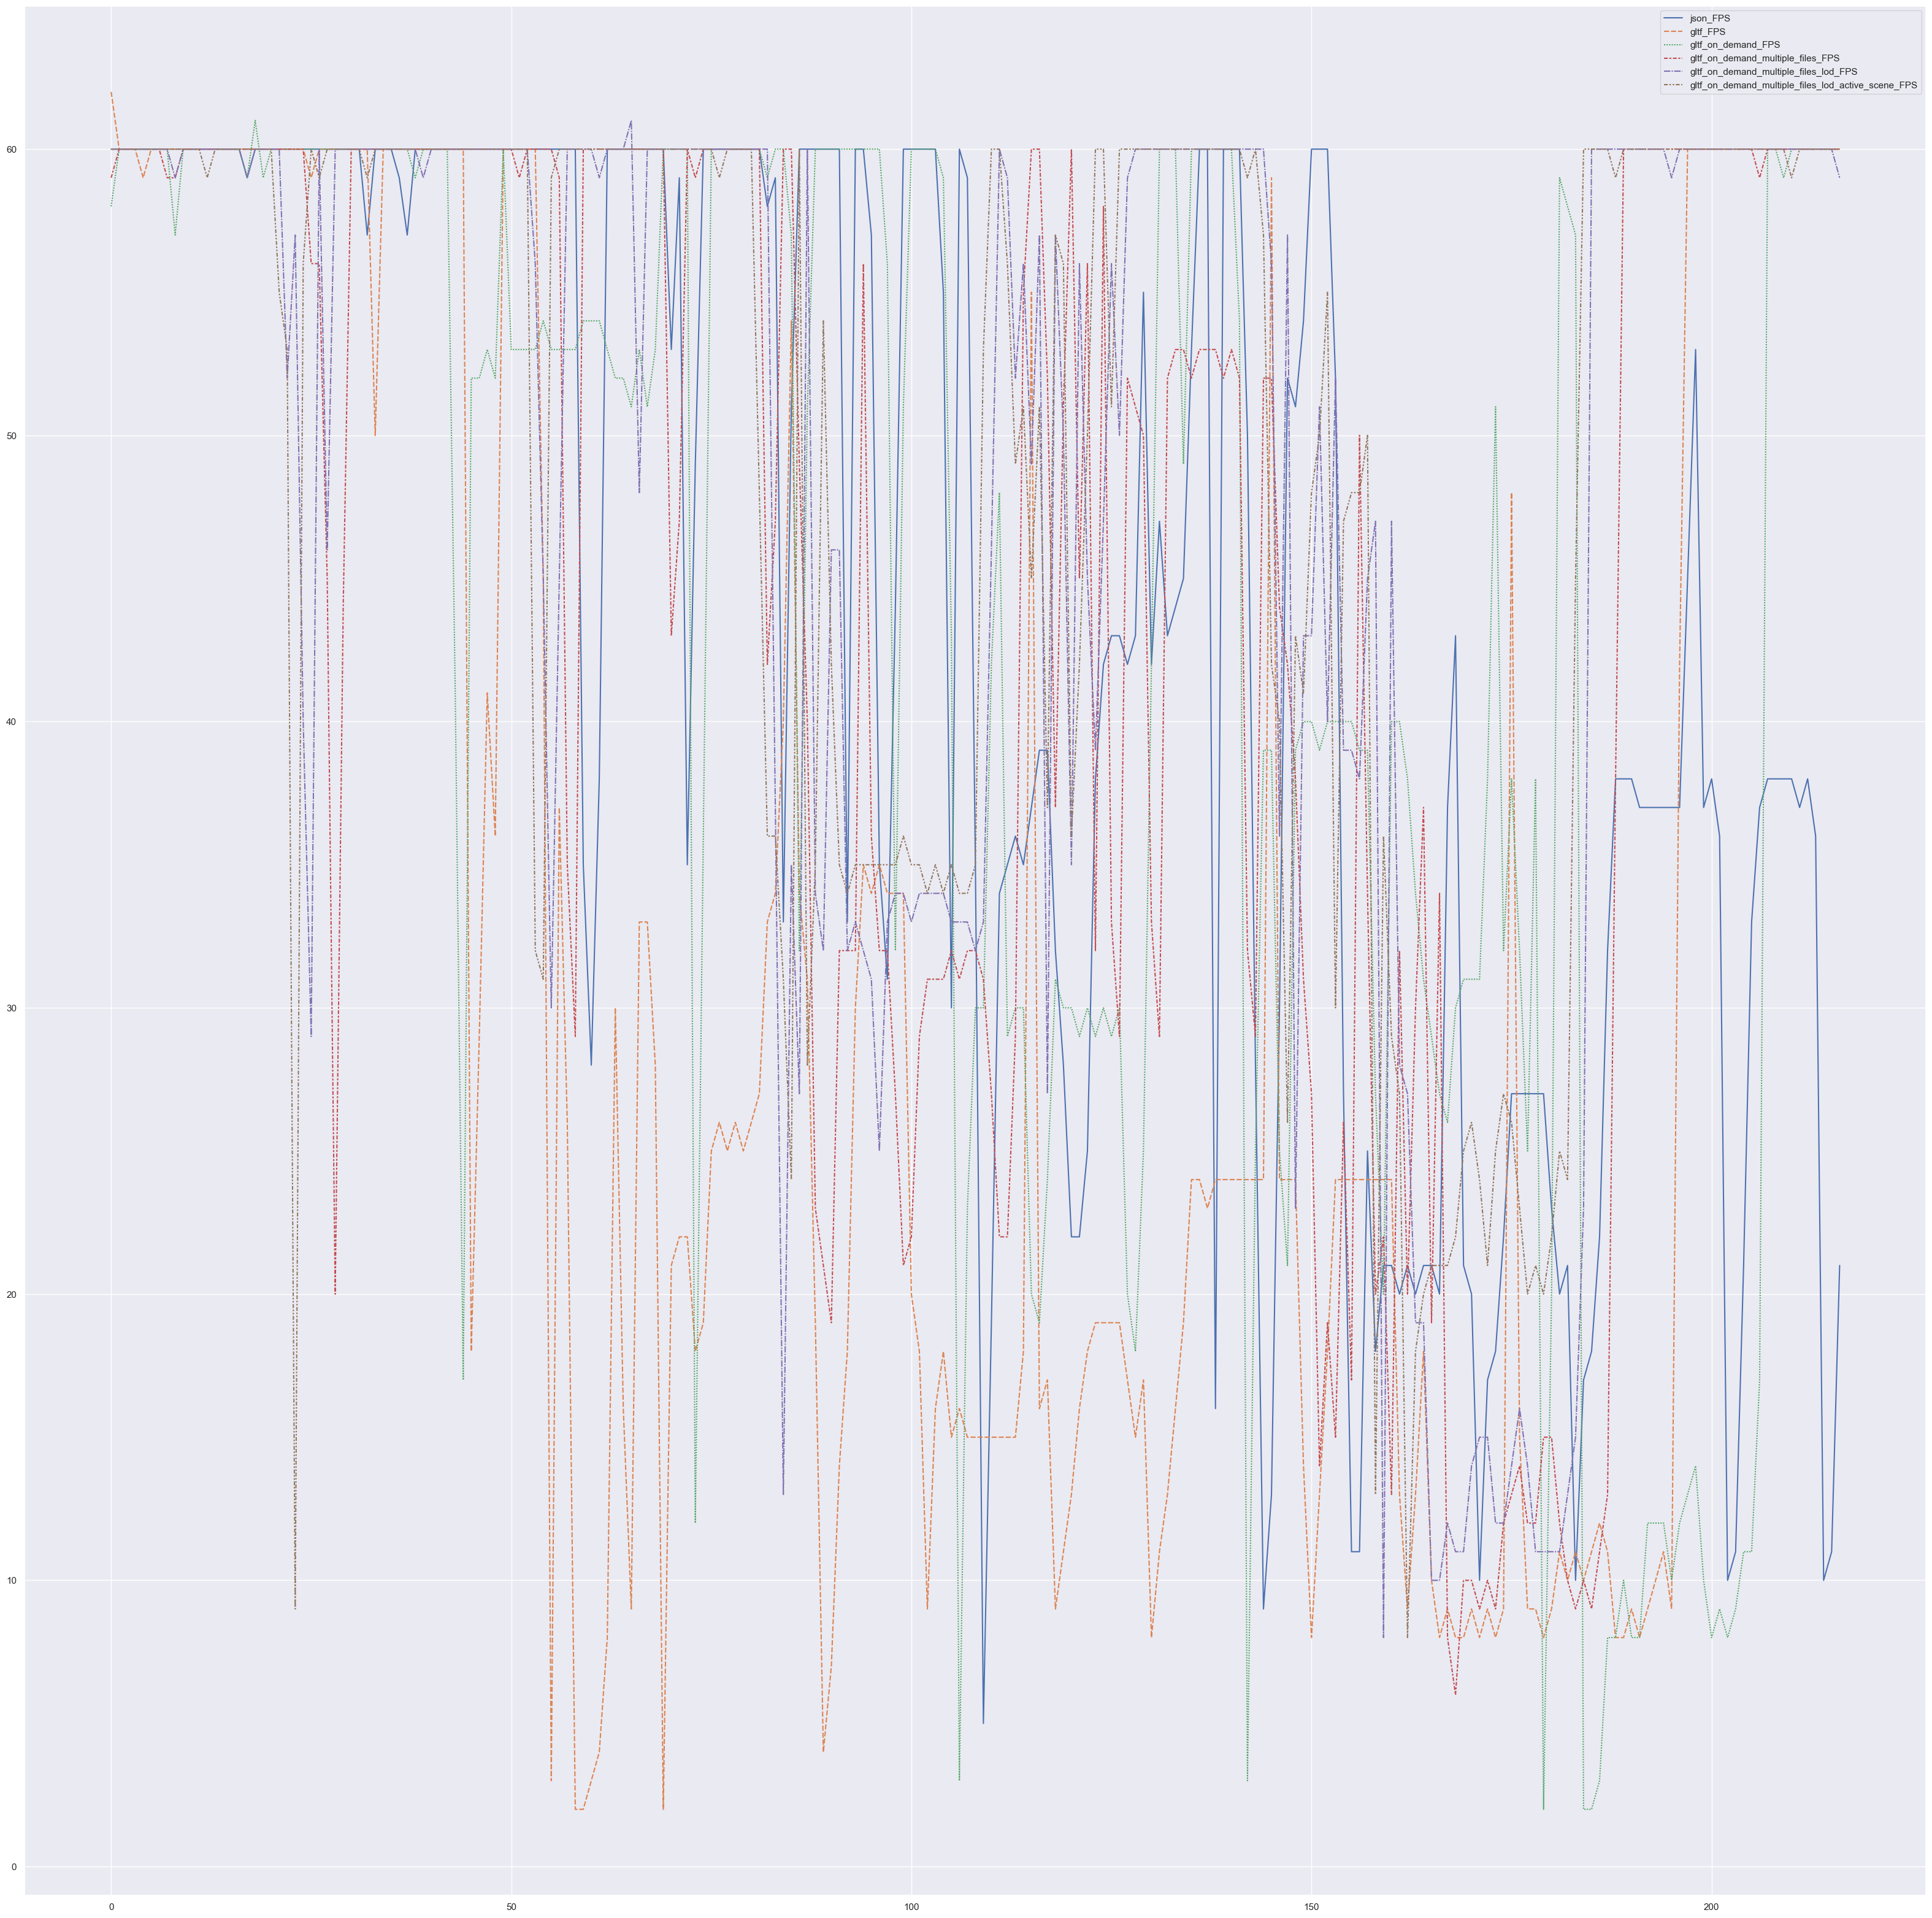

In [4]:
fps_df = df_dict['FPS']
fps_df = fps_df.drop('TIME', axis=1)
ax = sns.lineplot(data=fps_df, linewidth='7')

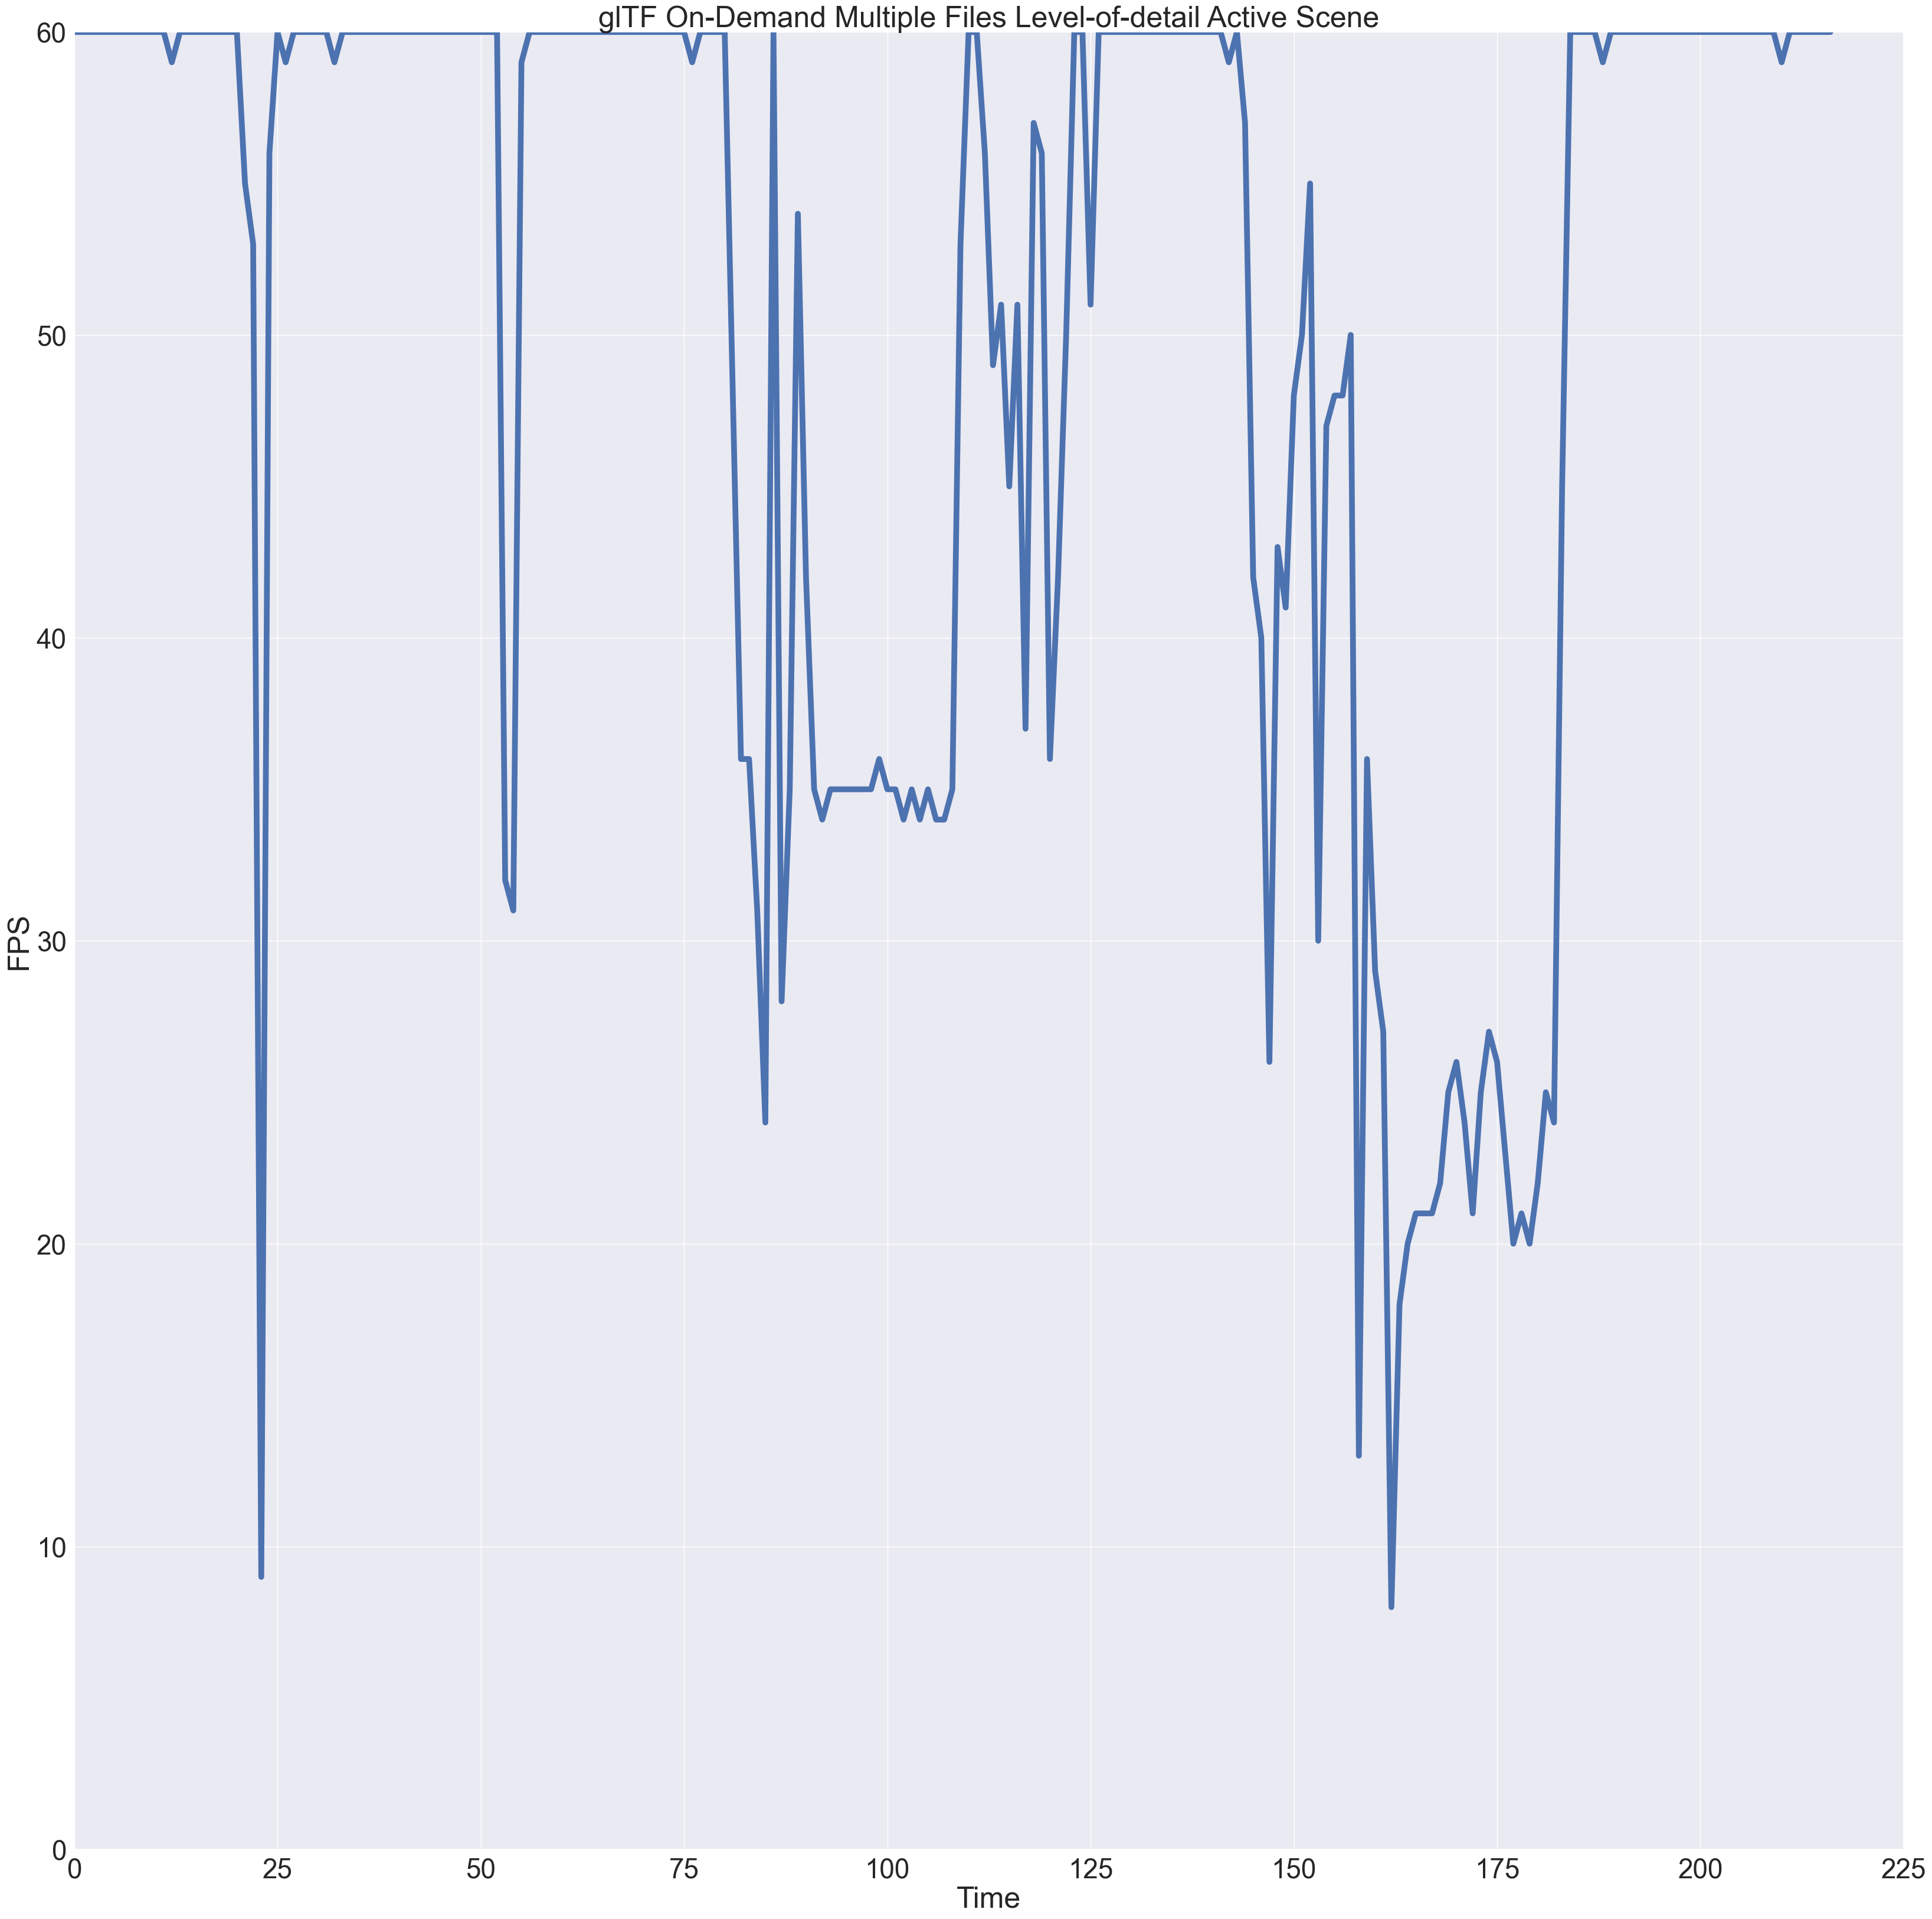

In [54]:
ax = sns.lineplot(data=fps_df['gltf_on_demand_multiple_files_lod_active_scene_FPS'], linewidth='7')
ax.set(ylim=(0, 60))
ax.set(xlim=(0, 225))
ax.set(title='glTF On-Demand Multiple Files Level-of-detail Active Scene', xlabel='Time', ylabel='FPS')
plt.show()

In [5]:
fps_avg = fps_df.mean()
fps_avg

json_FPS                                              44.870968
gltf_FPS                                              32.373272
gltf_on_demand_FPS                                    43.990783
gltf_on_demand_multiple_files_FPS                     45.511521
gltf_on_demand_multiple_files_lod_FPS                 48.838710
gltf_on_demand_multiple_files_lod_active_scene_FPS    50.308756
dtype: float64

<AxesSubplot: >

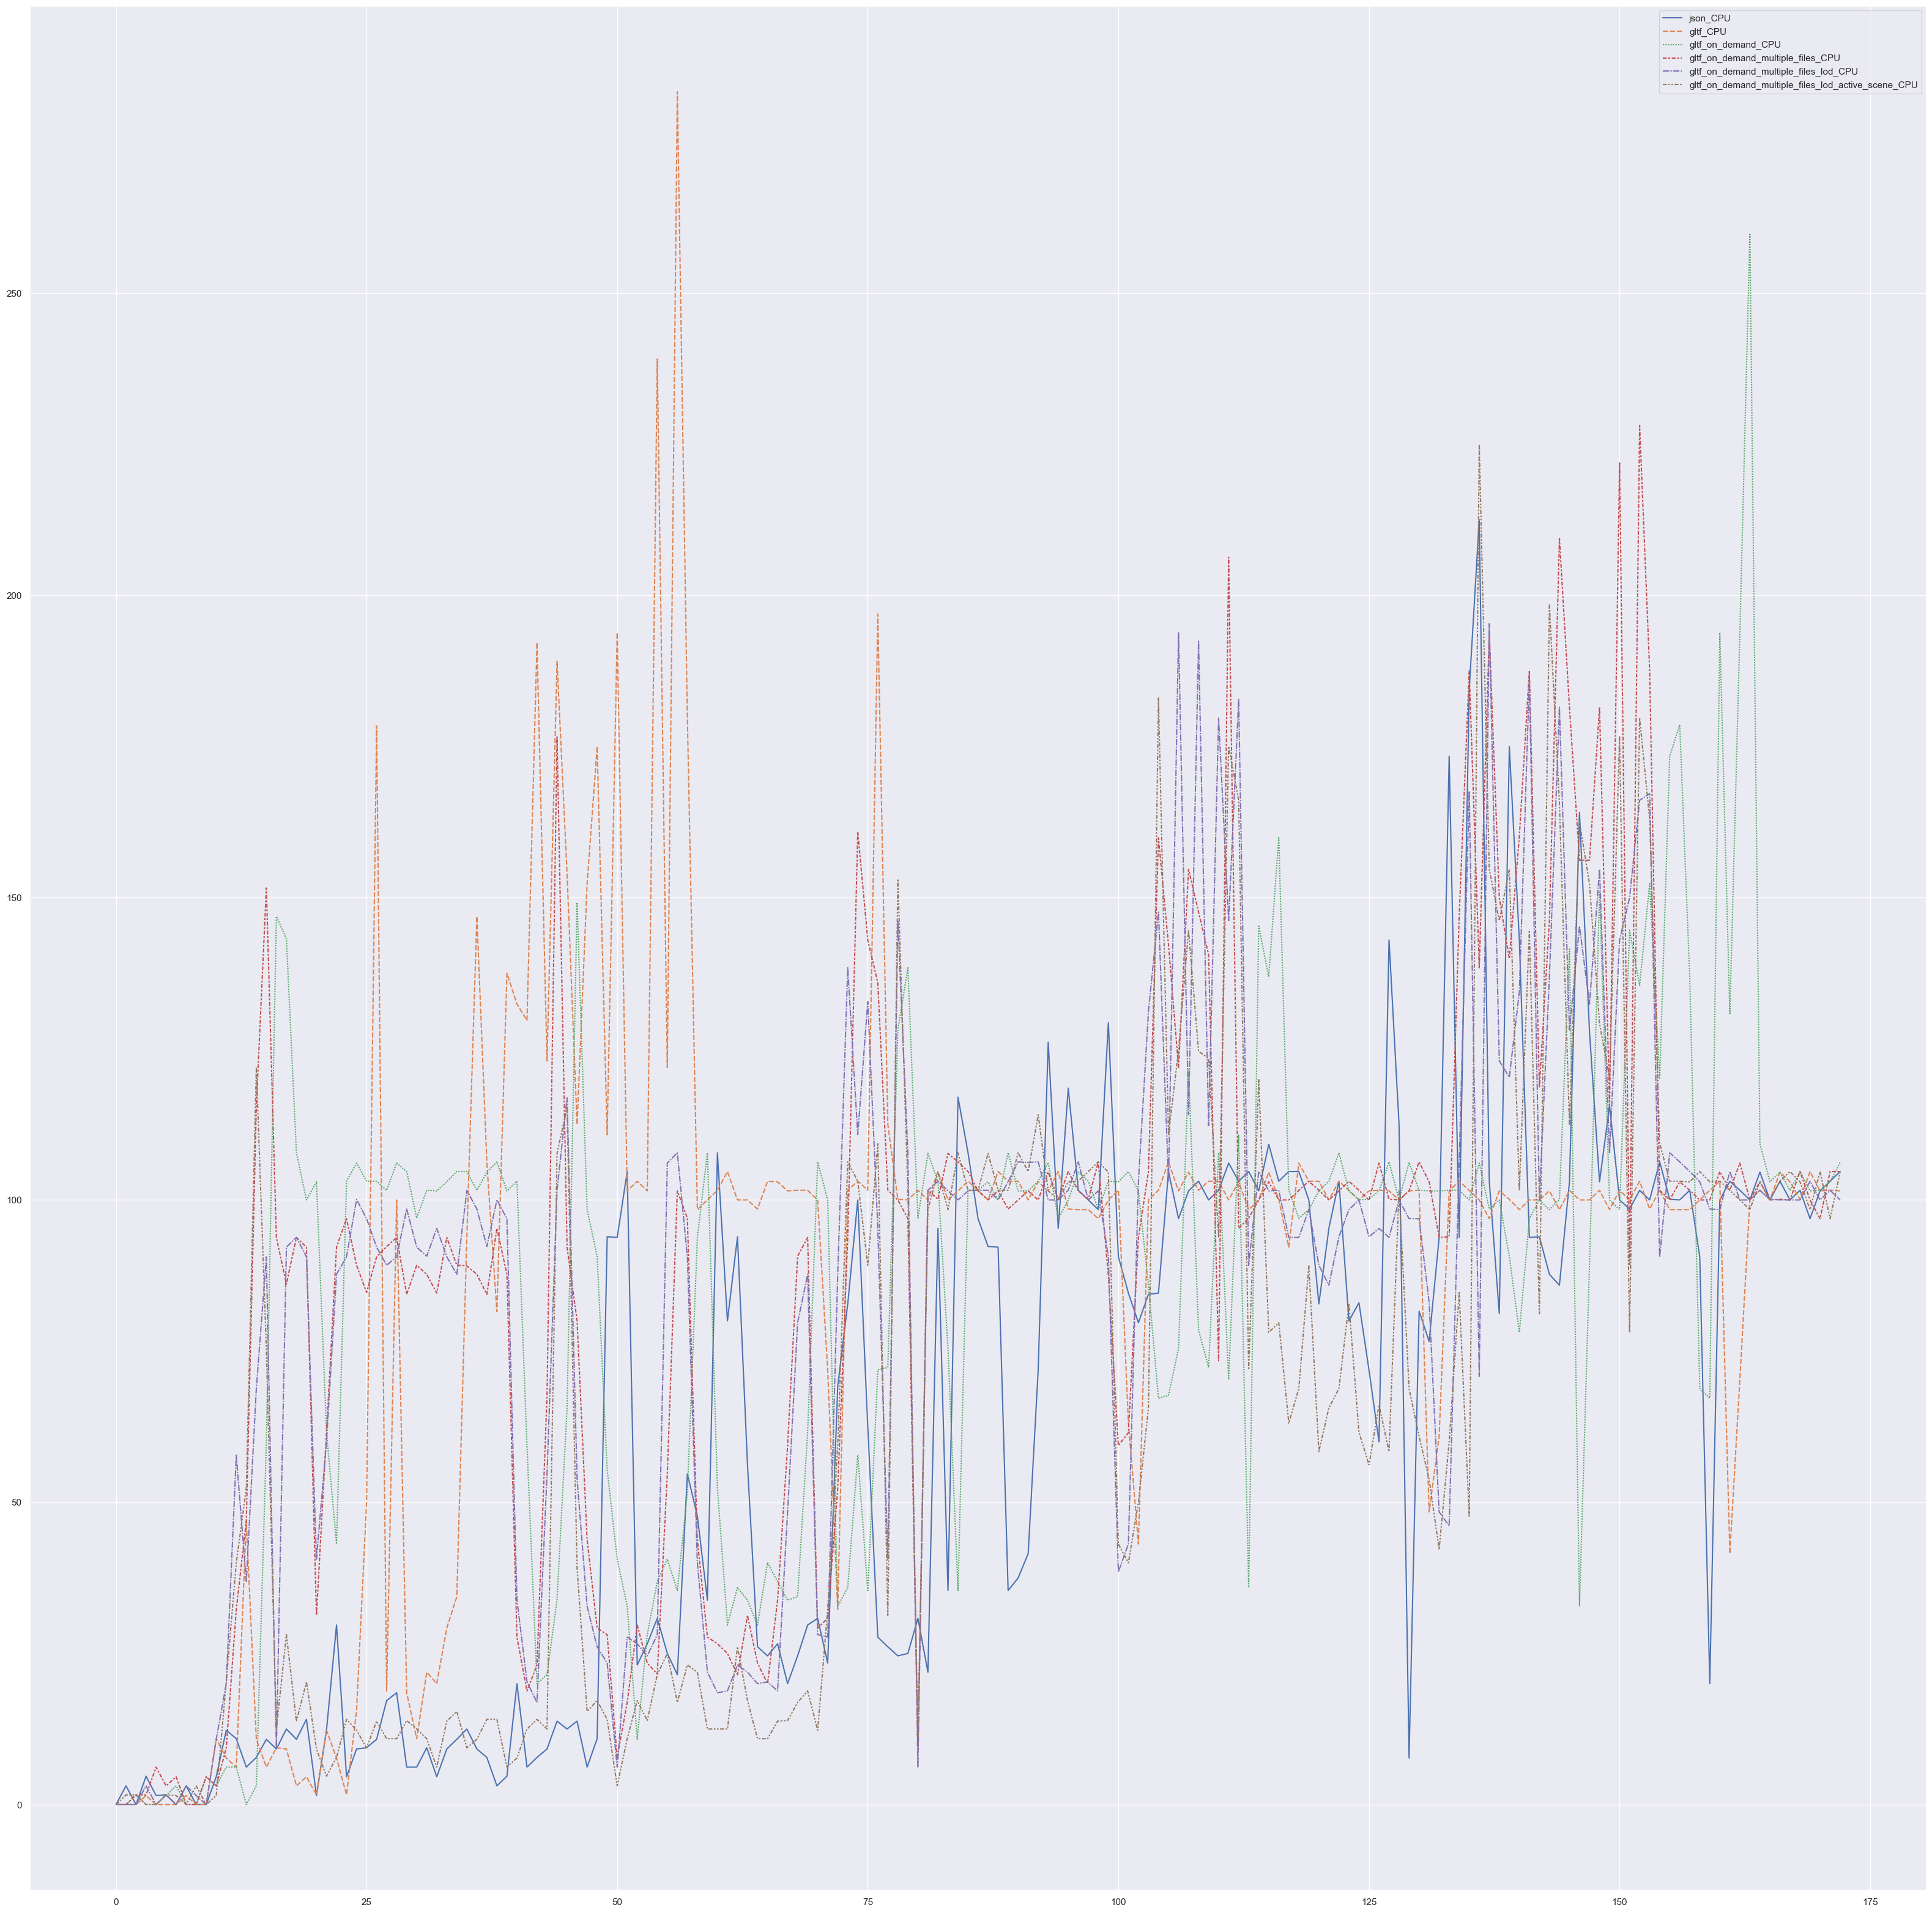

In [6]:
cpu_df = df_dict['CPU']
cpu_df = cpu_df.drop('TIME', axis=1)
sns.lineplot(data=cpu_df)

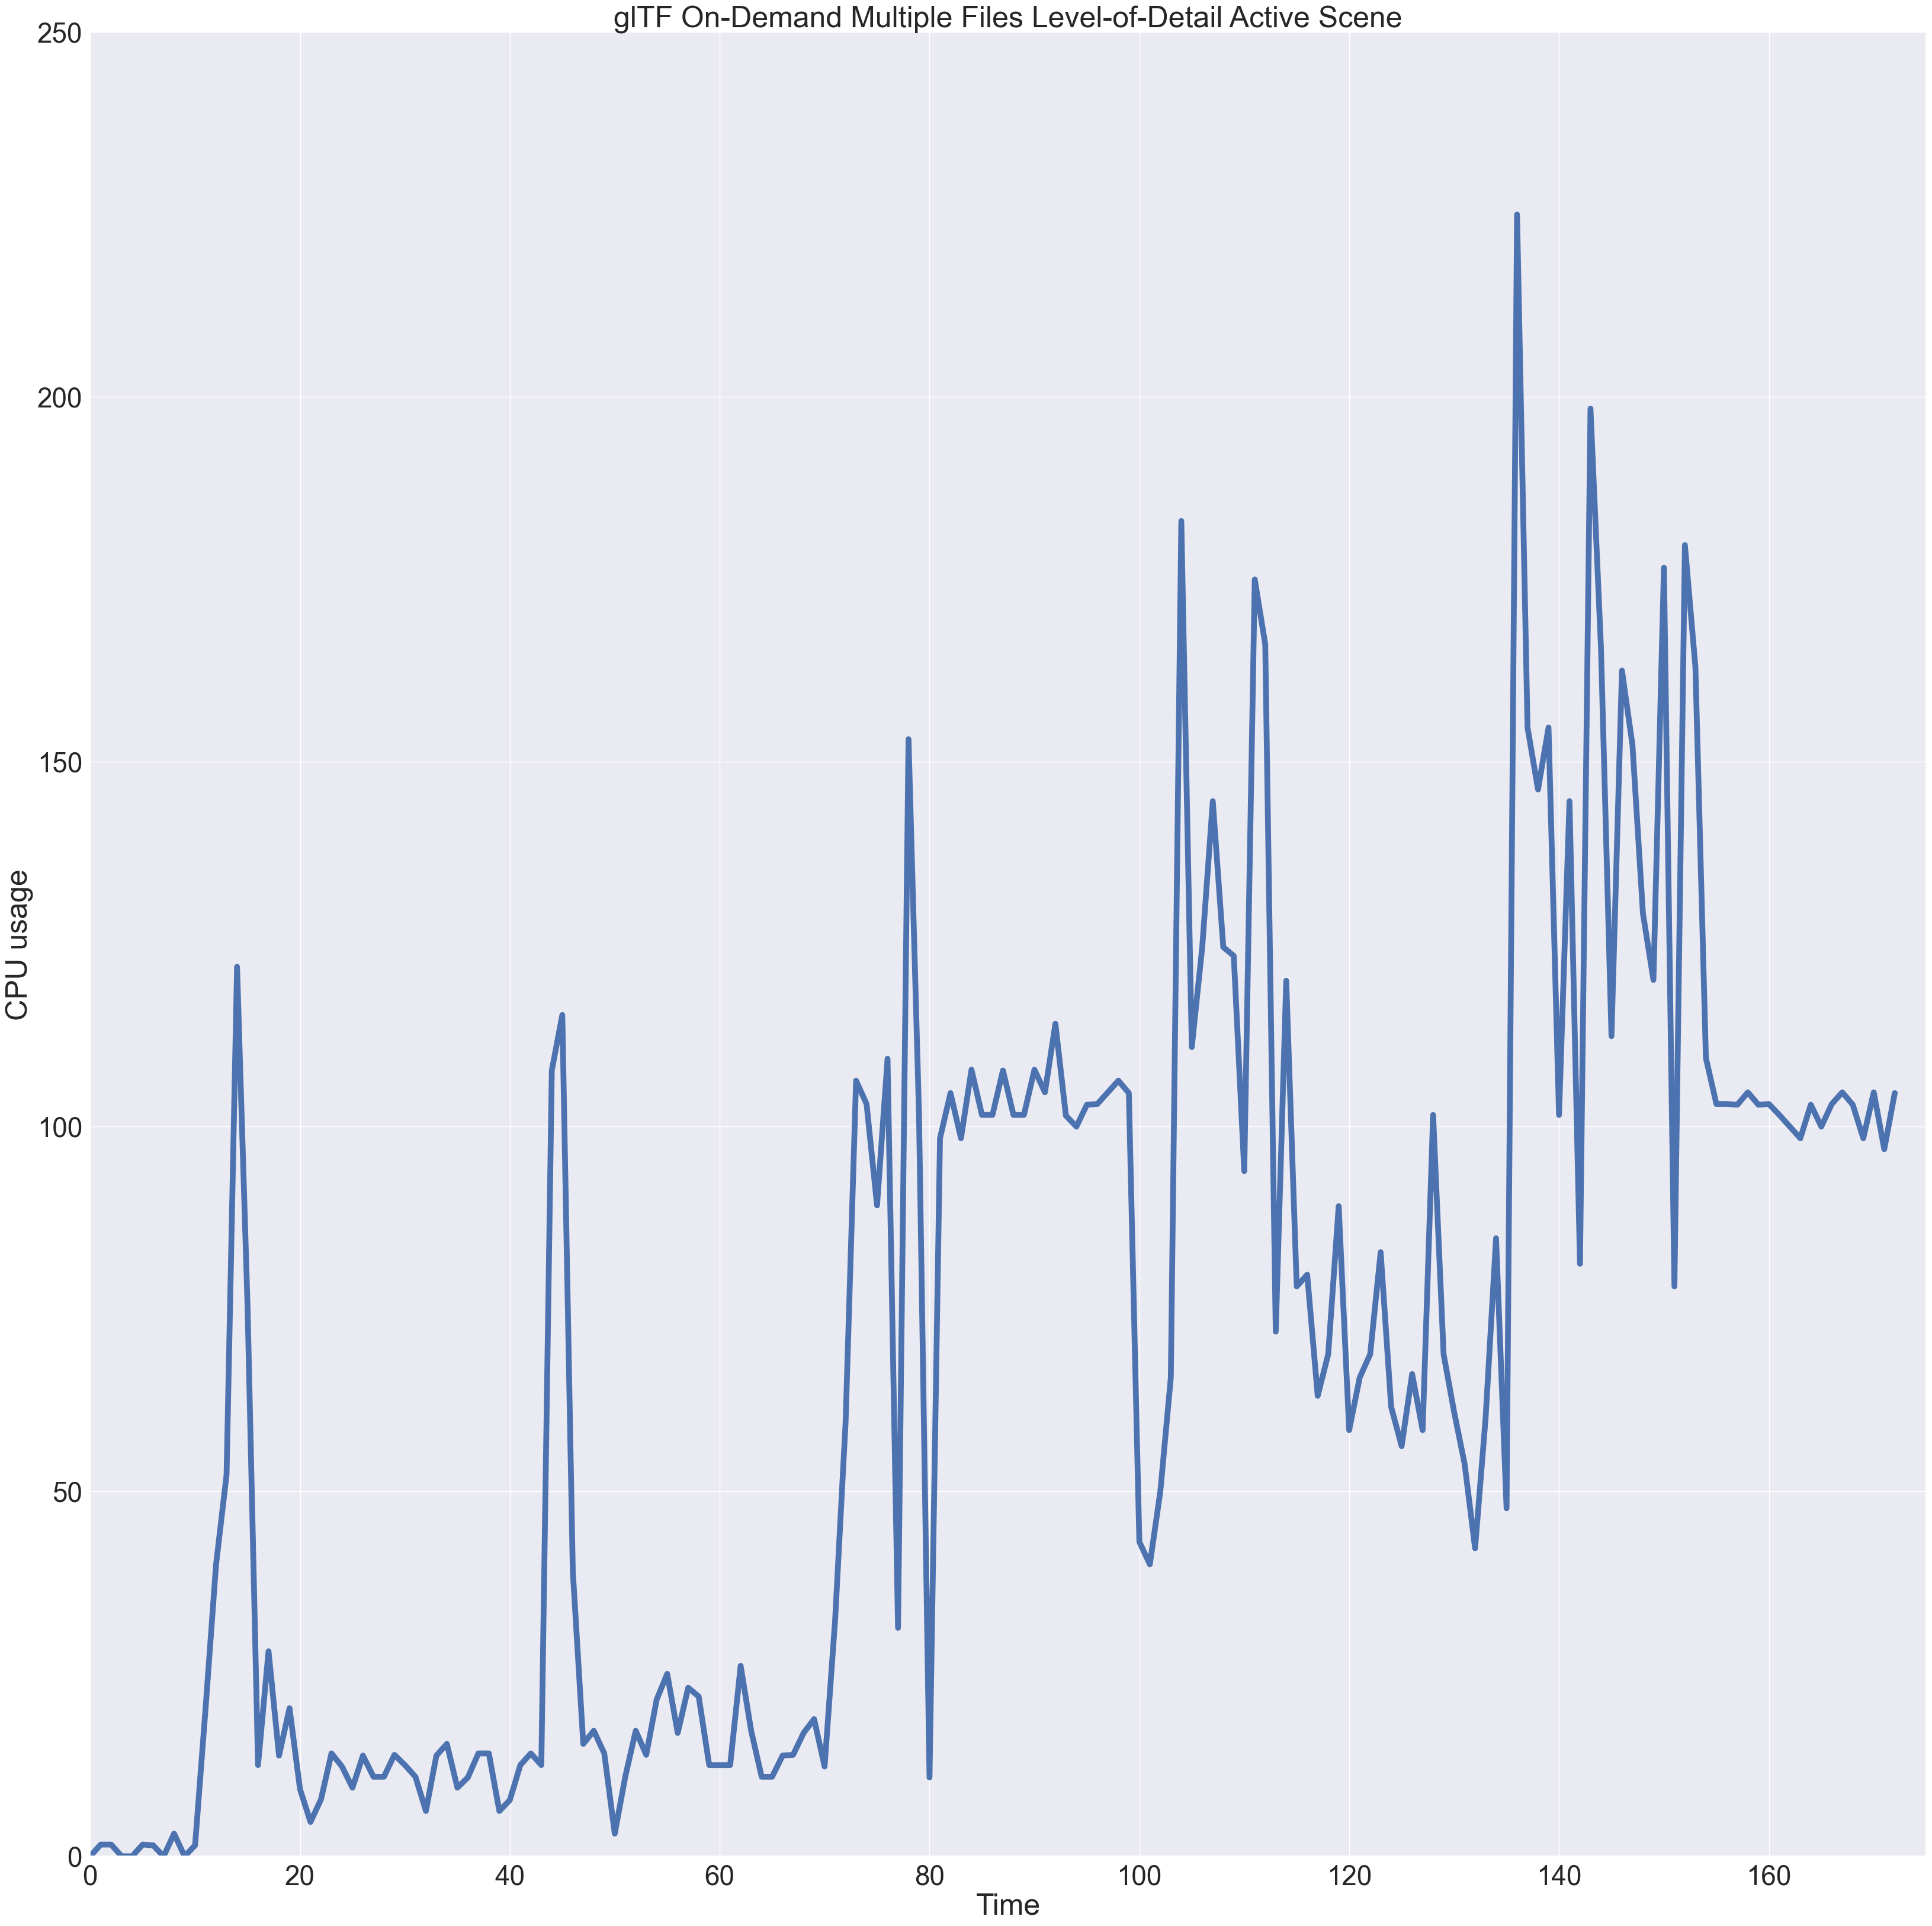

In [39]:
ax = sns.lineplot(data=cpu_df['gltf_on_demand_multiple_files_lod_active_scene_CPU'], linewidth='7')
ax.set(ylim=(0, 250))
ax.set(xlim=(0, 175))
ax.set(title='glTF On-Demand Multiple Files Level-of-Detail Active Scene', xlabel='Time', ylabel='CPU usage')
plt.show()

In [7]:
cpu_avg = cpu_df.mean()
cpu_avg

json_CPU                                              63.658960
gltf_CPU                                              88.787283
gltf_on_demand_CPU                                    85.508671
gltf_on_demand_multiple_files_CPU                     90.626012
gltf_on_demand_multiple_files_lod_CPU                 85.975723
gltf_on_demand_multiple_files_lod_active_scene_CPU    67.743931
dtype: float64

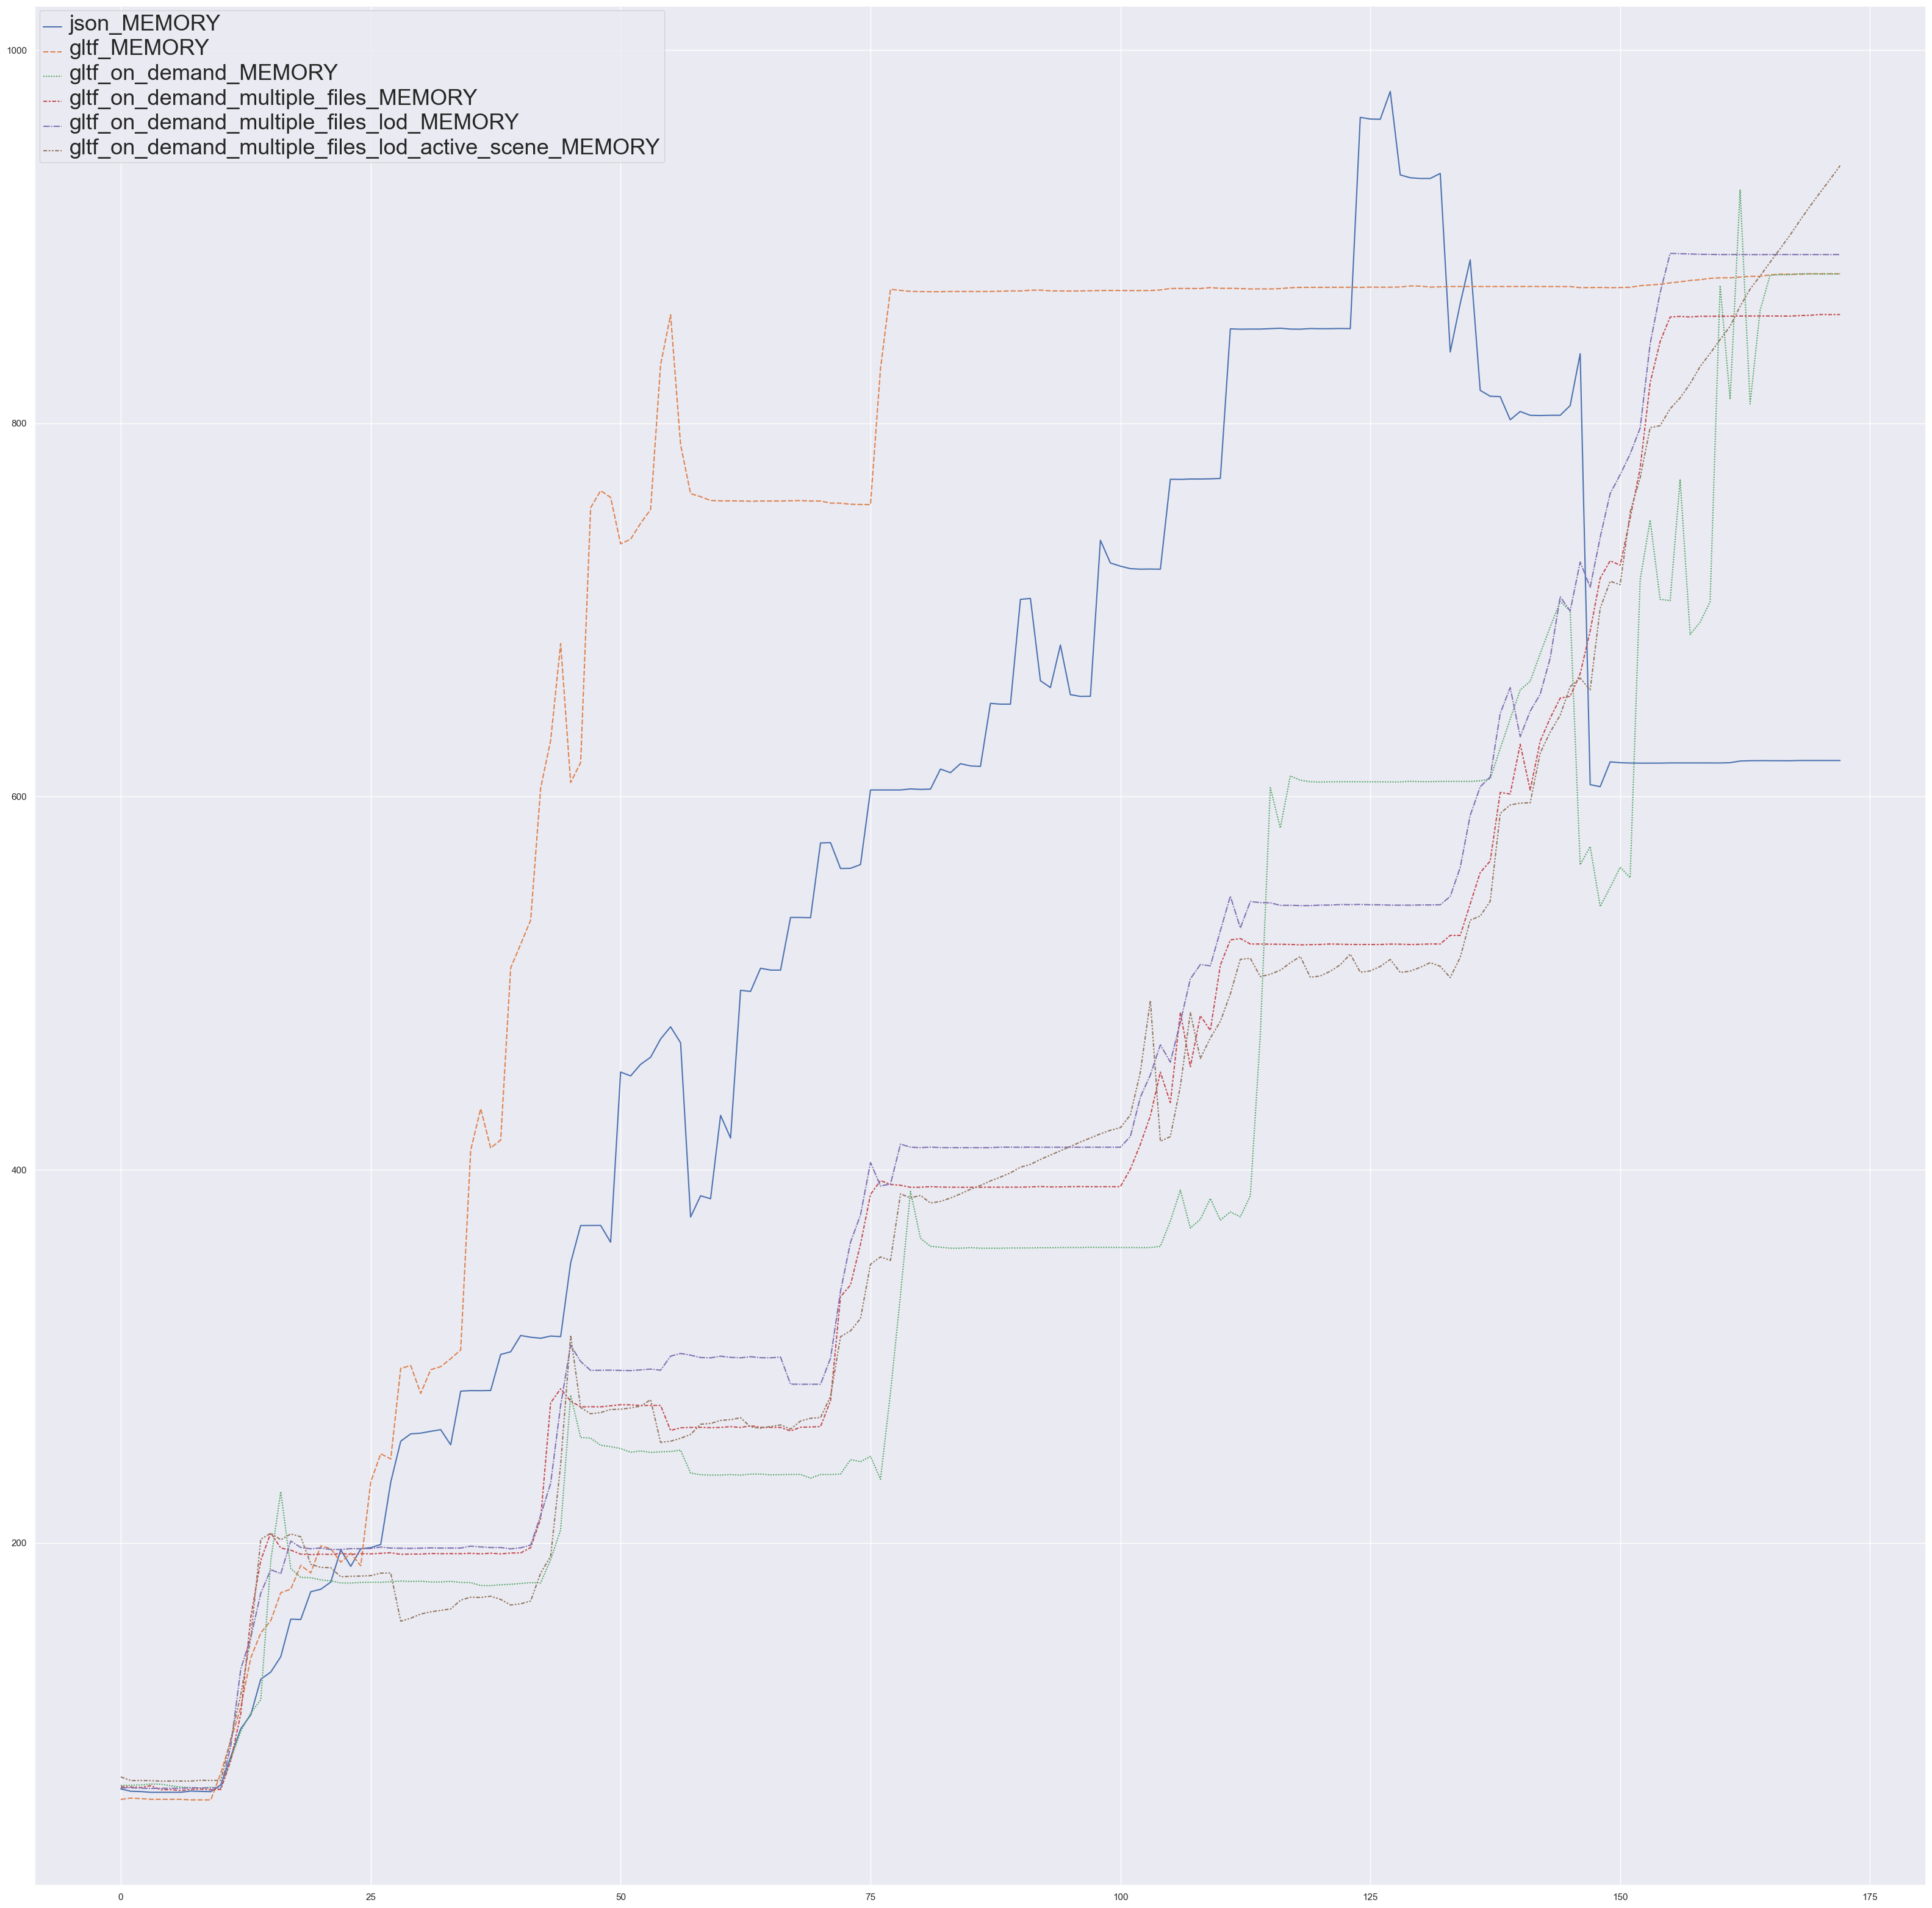

In [14]:
memory_df = df_dict['MEMORY']
memory_df = memory_df.drop('TIME', axis=1)
ax = sns.lineplot(data=memory_df, sort=True)
plt.setp(ax.get_legend().get_texts(), fontsize='26')
plt.show()

In [9]:
memory_avg = memory_df.mean()
memory_avg

json_MEMORY                                              542.126152
gltf_MEMORY                                              687.957438
gltf_on_demand_MEMORY                                    393.034456
gltf_on_demand_multiple_files_MEMORY                     413.878297
gltf_on_demand_multiple_files_lod_MEMORY                 433.442851
gltf_on_demand_multiple_files_lod_active_scene_MEMORY    409.151463
dtype: float64

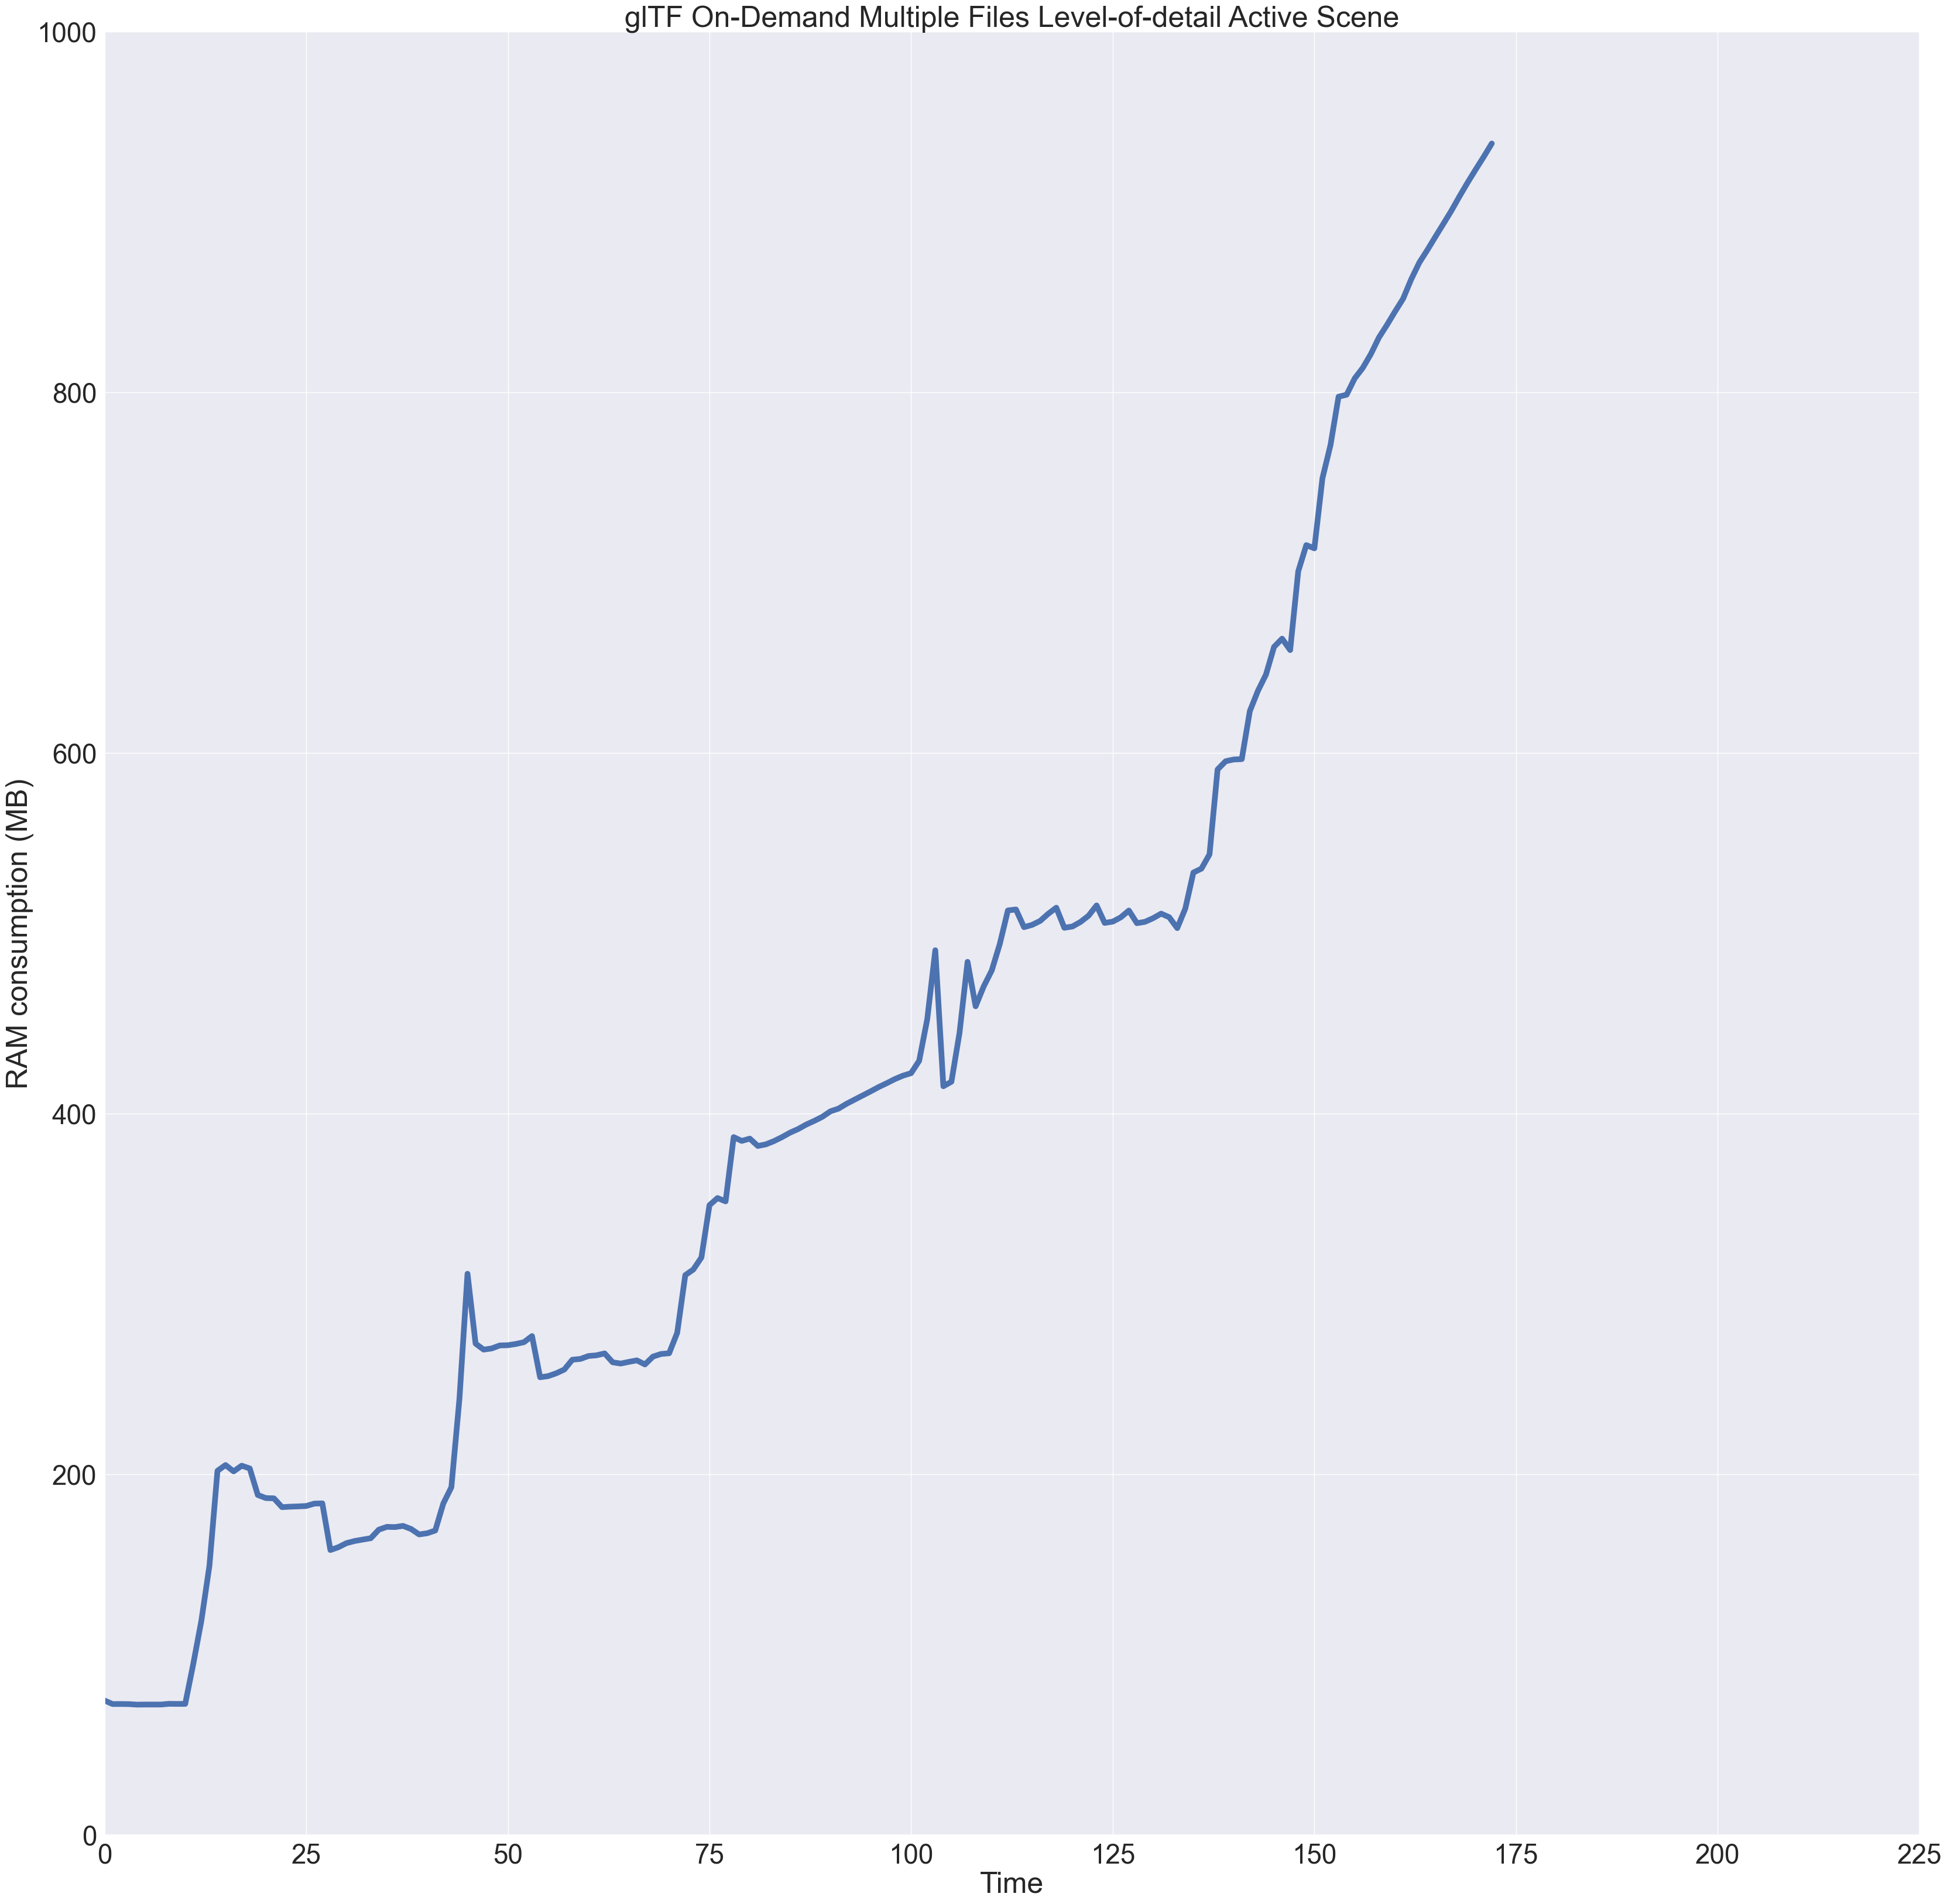

In [60]:
ax = sns.lineplot(data=memory_df['gltf_on_demand_multiple_files_lod_active_scene_MEMORY'], linewidth='7')
ax.set(ylim=(0, 1000))
ax.set(xlim=(0, 225)) 
ax.set(title='glTF On-Demand Multiple Files Level-of-detail Active Scene', xlabel='Time', ylabel='RAM consumption (MB)')
plt.show()